In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/tmp/ipykernel_3253/2324892354.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-28 16:42:18.404705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 16:42:18.404809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 16:42:18.791926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

In [2]:
def load_dataset(csv_path):
    df = pd.read_csv(csv_path, sep=';')
    required_columns = ['Azimuth', 'Altitude','Timestamp']

    if not all(col in df.columns for col in required_columns):
        raise ValueError("Reguired columns are not present in the DataFrame.")

    X = df[['Azimuth','Altitude']].values
    y = df['Timestamp'].values
    return X,y, df

In [3]:
csv_path = 'cleaned/cleaned_data_quartal_1_2020.csv'

In [4]:
X, y, df = load_dataset(csv_path)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

2024-02-28 16:42:32.751418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 16:42:35.265191: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 16:42:35.265421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 16:42:35.272704: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 16:42:35.272916: I external/local_xla/xla/stream_executor

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_normalized, y_train, epochs=80, batch_size=32, validation_split=0.2)
predictions = model.predict(X_test_normalized)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Epoch 1/80


2024-02-28 16:42:40.472139: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-28 16:42:42.763007: I external/local_xla/xla/service/service.cc:168] XLA service 0x55f201b37270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 16:42:42.763126: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-02-28 16:42:42.950254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-28 16:42:43.319524: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709113363.597322    3353 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


263/263 [==============================] - 10s 8ms/step - loss: 2501997532876374016.0000 - val_loss: 2501797421760118784.0000
Epoch 2/80
263/263 [==============================] - 1s 5ms/step - loss: 2501148709899730944.0000 - val_loss: 2500032155841724416.0000
Epoch 3/80
263/263 [==============================] - 2s 6ms/step - loss: 2497987064214061056.0000 - val_loss: 2495270170981826560.0000
Epoch 4/80
263/263 [==============================] - 1s 5ms/step - loss: 2491274820604395520.0000 - val_loss: 2486474627715432448.0000
Epoch 5/80
263/263 [==============================] - 1s 6ms/step - loss: 2480111204169678848.0000 - val_loss: 2472891261065887744.0000
Epoch 6/80
263/263 [==============================] - 1s 6ms/step - loss: 2463876640107659264.0000 - val_loss: 2454002750812323840.0000
Epoch 7/80
263/263 [==============================] - 2s 6ms/step - loss: 2442102736464904192.0000 - val_loss: 2429435537879203840.0000
Epoch 8/80
263/263 [==============================] - 1s 5

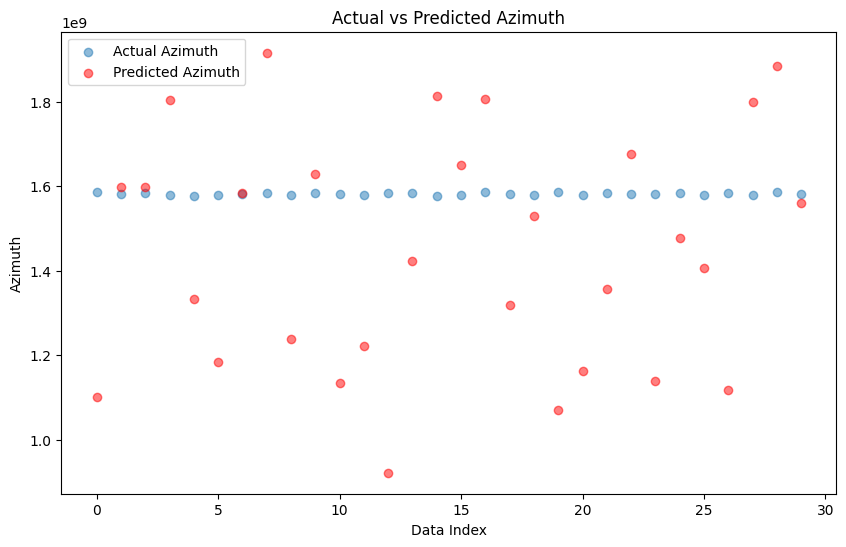

In [10]:
plt.figure(figsize=(10, 6))

# Ambil hanya 10 data
num_data_to_plot = 30
X_test_subset = X_test[:num_data_to_plot]
y_test_subset = y_test[:num_data_to_plot]

# Plot azimuth aktual
plt.scatter(range(num_data_to_plot), y_test_subset, label='Actual Azimuth', alpha=0.5)

# Plot azimuth prediksi
predictions_subset = predictions[:num_data_to_plot]
plt.scatter(range(num_data_to_plot), predictions_subset, label='Predicted Azimuth', color='red', alpha=0.5)

plt.title('Actual vs Predicted Azimuth')
plt.xlabel('Data Index')
plt.ylabel('Azimuth')
plt.legend()
plt.show()